- y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# Load data
housing = fetch_california_housing()
x, y = housing.data, housing.target

In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Train model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Predictions
y_pred = model.predict(x_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 0.54
RMSE: 0.74
R²: 0.59


In [13]:
feature_names = housing.feature_names
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef:.2f}")

MedInc: 0.85
HouseAge: 0.12
AveRooms: -0.30
AveBedrms: 0.35
Population: -0.00
AveOccup: -0.04
Latitude: -0.89
Longitude: -0.87


Normality test p-value: 0.0000


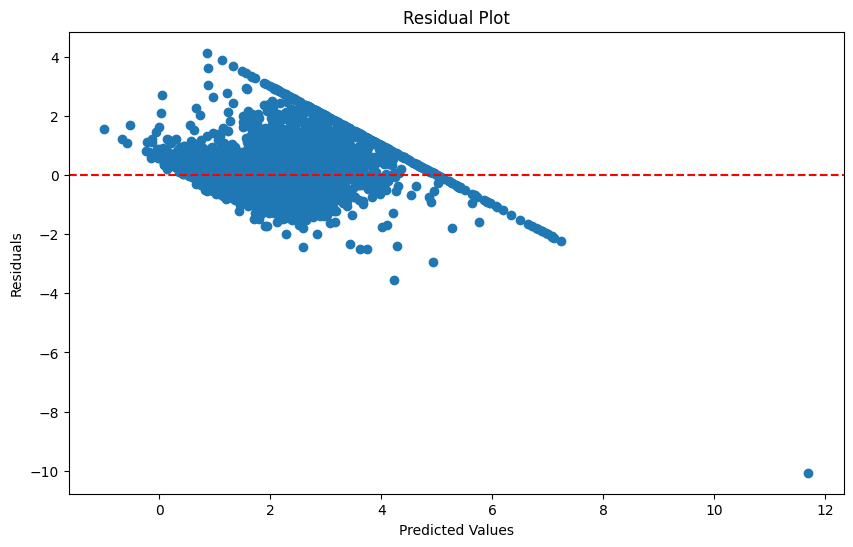

In [ ]:
# Residuals
residuals = y_test - y_pred

# 1. Check normality of residuals
stat, p_value = stats.shapiro(residuals[:1000])
print(f"Normality test p-value: {p_value:.4f}")

# 2. Check homoscedasticity (visual)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

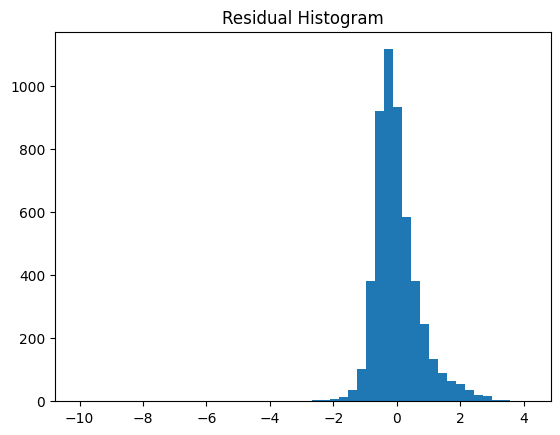

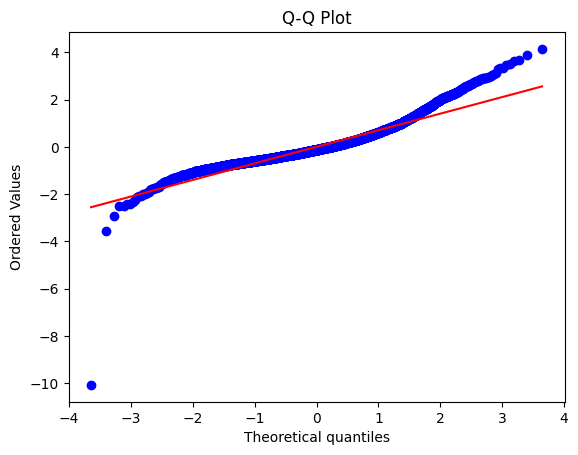

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.hist(residuals, bins=50)
plt.title("Residual Histogram")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [20]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_test_sm = sm.add_constant(x_test_scaled)
bp = het_breuschpagan(residuals, X_test_sm)
labels = ["LM Stat","LM p-value","F Stat","F p-value"]
print(dict(zip(labels, bp)))


{'LM Stat': np.float64(2469.847891607988), 'LM p-value': np.float64(0.0), 'F Stat': np.float64(591.1462427154908), 'F p-value': np.float64(0.0)}
